In [1]:
pip install fbprophet

In [2]:
import fbprophet

In [3]:
print('Prophet %s'% fbprophet.__version__)

Prophet 0.7.1


In [4]:
# load the car sales dataset
from pandas import read_csv
# load data
path = '.......monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


In [10]:
df.tail()

,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


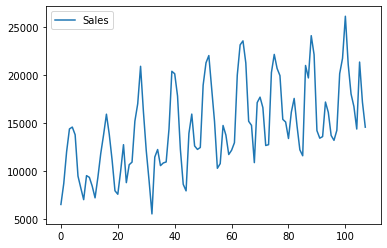

In [5]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [6]:
from pandas import to_datetime
from fbprophet import Prophet

In [7]:
df.columns=['ds','y']
df['ds']=to_datetime(df['ds'])

In [8]:
model=Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
from pandas import DataFrame
# define the period for which we want a prediction
future = list()
for i in range(1,13):
  date='1968-%02d' %i
  future.append([date])
future=DataFrame(future)

In [13]:
future.head()

,0
0,1968-01
1,1968-02
2,1968-03
3,1968-04
4,1968-05


In [15]:
future.columns=['ds']
future['ds']=to_datetime(future['ds'])

In [16]:
forecast=model.predict(future)

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12633.729689  15839.517714
1 1968-02-01  14905.955964  13291.095502  16494.354854
2 1968-03-01  20842.150502  19297.587326  22410.078756
3 1968-04-01  22870.095215  21365.426100  24473.906458
4 1968-05-01  24176.211162  22678.737505  25663.953506


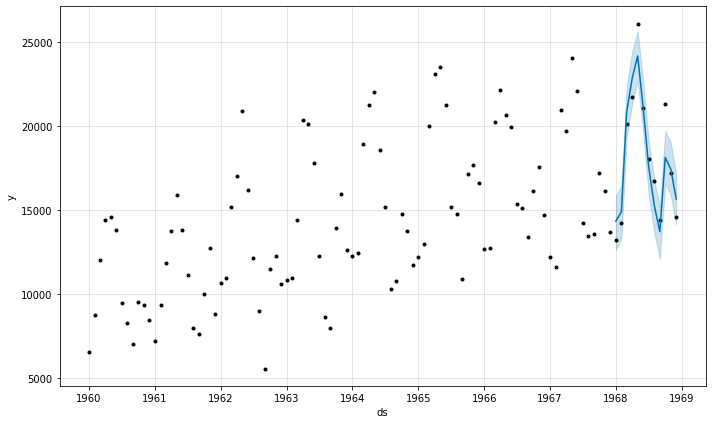

In [18]:
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
model.plot(forecast)
pyplot.show()

In [19]:
##Make an Out-of-Sample Forecast

In [20]:
future2=list()
for i in range(1,13):
  date='1969-%02d' % i
  future2.append([date])
future2=DataFrame(future2)

In [37]:
future2.columns=['ds']
future2['ds']=to_datetime(future2['ds'])
forecast2=model.predict(future2)

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  14960.971567  13410.122820  16477.141416
1 1969-02-01  15751.901572  14184.722877  17284.401421
2 1969-03-01  21179.064426  19650.015363  22701.878224
3 1969-04-01  23379.265471  21817.641288  24954.661871
4 1969-05-01  24314.273396  22834.092386  25855.111605


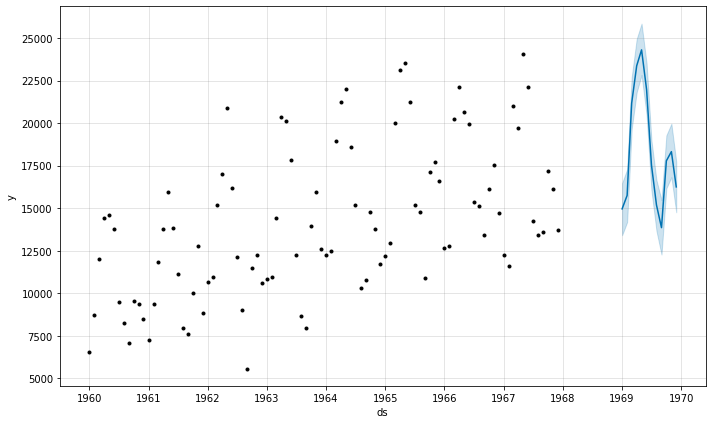

In [38]:
print(forecast2[['ds','yhat','yhat_lower','yhat_upper']].head())
model.plot(forecast2)
pyplot.show()

In [39]:
#Manually evaluate a Prophet model on a hold-out dataset

In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
train=df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [42]:
model=Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future3=list()
for i in range(1,13):
  date='1968-%02d' % i
  future3.append([date])
future3=DataFrame(future3)
future3.columns=['ds']
future['ds']=to_datetime(future['ds'])

In [44]:
forcast3=model.predict(future3)

In [45]:
y_true=df['y'][-12:].values
y_pred=forecast['yhat'].values
mae=mean_absolute_error(y_true, y_pred)
print('MAE:% .3f' %mae)

MAE: 1054.166


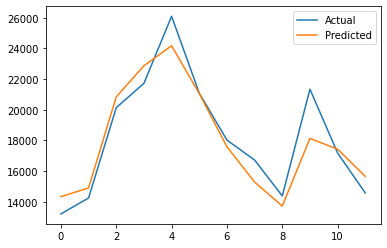

In [46]:
pyplot.plot(y_true,label='Actual')
pyplot.plot(y_pred,label='Predicted')
pyplot.legend()
pyplot.show()

In [47]:
# The forecast is a good fit. The model has skill and forecast that looks sensible